# Abstract

## Resumen (ES)

**Palabras clave:** cinemática directa e inversa, DH estándar, jacobiano, singularidades, LSPB, tpoly, trayectoria cartesiana, ScanArm, MATLAB. ([GitHub][1])


Este proyecto presenta el modelado, análisis y simulación de un brazo articulado tipo **ScanArm** de **6 grados de libertad** parametrizado mediante **Denavit–Hartenberg estándar** (unidades: **m**). A partir de la tabla DH propuesta, se desarrolla la **cinemática directa** para reconstruir la pose del efector y la **cinemática inversa** para planificar movimientos hacia poses objetivo. Se estudia la **relación velocidad-articular** mediante el **jacobiano**, identificando **singularidades** y zonas de bajo condicionamiento relevantes para tareas de medición. En planificación, se implementan trayectorias **P2P** con perfiles **LSPB** y transiciones **quintic (tpoly)**, y trayectorias **cartesianas en SE(3)** para barridos de escaneo. El trabajo contempla dos escenarios: **uso pasivo** (medición guiada por operario, cinemática directa con encoders) y una **variante cooperativa actuada** para evaluación académica, donde la CI habilita la ejecución automática de vías en un entorno controlado. Se reportan simulaciones del **workspace**, perfiles cinemáticos y animaciones del recorrido, así como criterios de seguridad y límites articulares. El desarrollo se integra en **MATLAB** dentro del repositorio del curso (`Simulation - Final/`), con scripts reproducibles y figuras exportables para el informe. ([GitHub Repository][1])

---

## Abstract (EN)

This project presents the modeling, analysis, and simulation of a **ScanArm-type** **6-DoF** articulated manipulator parameterized with **standard Denavit–Hartenberg** notation (units in **meters**). Based on the proposed DH table, we derive **forward kinematics** to reconstruct the end-effector pose and **inverse kinematics** to plan motions toward target poses. We analyze the **joint-to-task velocity mapping** through the **Jacobian**, highlighting **singularities** and poor-conditioning regions that matter for measurement tasks. For motion planning, we implement **point-to-point** profiles using **LSPB** and **quintic (tpoly)** timing, and **Cartesian SE(3) paths** tailored to scanning sweeps. Two use cases are considered: a **passive** operation (human-guided measurement, forward kinematics via encoders) and a **cooperative actuated** variant for academic evaluation, where IK enables automatic execution of waypoints under safe limits. We report simulations of the **workspace**, joint/Cartesian profiles, and rendered animations, together with safety criteria and joint bounds. The implementation is provided in **MATLAB** within the course repository (`Simulation - Final/`), including reproducible scripts and exportable figures for the final report. ([GitHGitHub Repositoryub][2])

**Keywords:** forward and inverse kinematics, standard DH, Jacobian, singularities, LSPB, tpoly, Cartesian trajectory, ScanArm, MATLAB. ([GitHub][1])

[1]: https://github.com/jerovidela/RoboticaI "GitHub - jerovidela/RoboticaI: Repositorio para trabajo grupal. Se puede usar como un google drive pero con control de versiones."
[2]: https://github.com/jerovidela/RoboticaI/tree/main/tp8 "RoboticaI/tp8 at main · jerovidela/RoboticaI · GitHub"


# Introducción

La inspección geométrica asistida por brazos articulados de medición ha ganado relevancia en entornos donde se requiere movilidad, alcance y rapidez de despliegue. En este proyecto se modela y analiza un manipulador tipo ScanArm de **6 grados de libertad**, parametrizado mediante la convención **Denavit–Hartenberg estándar** con unidades en **metros**. El objetivo general es establecer una base cinemática sólida para tareas de escaneo y palpado, evaluando el desempeño geométrico del sistema y su capacidad para generar trayectorias que preserven la calidad metrológica.

El trabajo aborda tanto la **cinemática directa** como la **cinemática inversa** del modelo propuesto, junto con el **jacobiano** y el estudio de **singularidades** y condicionamiento. Si bien muchos dispositivos comerciales operan en modo **pasivo** (movidos por el operario y sensados por encoders), aquí se incorpora una **variante cooperativa actuada** con fines académicos: la CI se utiliza para planificar y, de ser pertinente, ejecutar vías cartesianas y articulares bajo límites de posición, velocidad y aceleración.

Para la **planificación de movimiento**, se emplean perfiles **LSPB** y polinomios **quintic** para movimientos punto a punto, y trayectorias **cartesianas en (SE(3))** adecuadas a barridos de escaneo. Se analizan criterios de seguridad, límites articulares y regiones mal condicionadas del jacobiano, evitando configuraciones cercanas a singularidades. Las simulaciones incluyen estimación del **espacio de trabajo**, perfiles cinemáticos y animaciones de recorridos representativos.

El desarrollo se implementa en **MATLAB** y se integra en el repositorio del curso (`RoboticaI/Simulation - Final`), con scripts reproducibles y exportables para documentar resultados. Este documento se organiza de la siguiente manera: primero se presenta la parametrización DH y la validación de la cinemática directa; luego la cinemática inversa y el análisis de velocidades; a continuación la planificación de trayectorias en espacio articular y cartesiano; se muestran las simulaciones y resultados; y finalmente se discuten conclusiones y líneas de trabajo futuro.


# Tareas a resolver y robot seleccionado

## Problema a resolver

La célula requiere medición y escaneo dimensional con agilidad: piezas cambiantes, sin utillajes específicos, sin una CMM fija y sin depender cada semana de la agenda y el presupuesto de un tercero. El objetivo es disponer de un medio con alcance volumétrico medio sobre mesa, capacidad de orientar la normal del efector para barridos, repetibilidad suficiente para práctica académica e inspección ligera, y un flujo reproducible que permita simular y documentar resultados de forma consistente.

## Robot seleccionado y pertinencia

Se adopta un brazo articulado tipo ScanArm de seis grados de libertad, modelado con la convención Denavit–Hartenberg (**DH**) estándar en metros. Esta arquitectura en serie ofrece un equilibrio favorable entre alcance y compacidad de la celda; los seis ejes permiten posicionar el TCP (**Tool Center Point**) y gobernar su orientación para seguir superficies, condición necesaria en barridos de escaneo. En operación pasiva, los encoders de las juntas y el modelo DH proporcionan la cinemática directa para reconstruir la pose; en la variante cooperativa actuada, la cinemática inversa habilita la ejecución de vías planificadas y el análisis de límites, singularidades y perfiles de movimiento. La planificación articular y cartesiana con trayectoria con perfil de velocidad trapezoidal (**LSPB**) y polinomios de quinto orden (**quintic**) evita sacudidas y respeta límites de posición, velocidad y aceleración, preservando la calidad de la medición.

























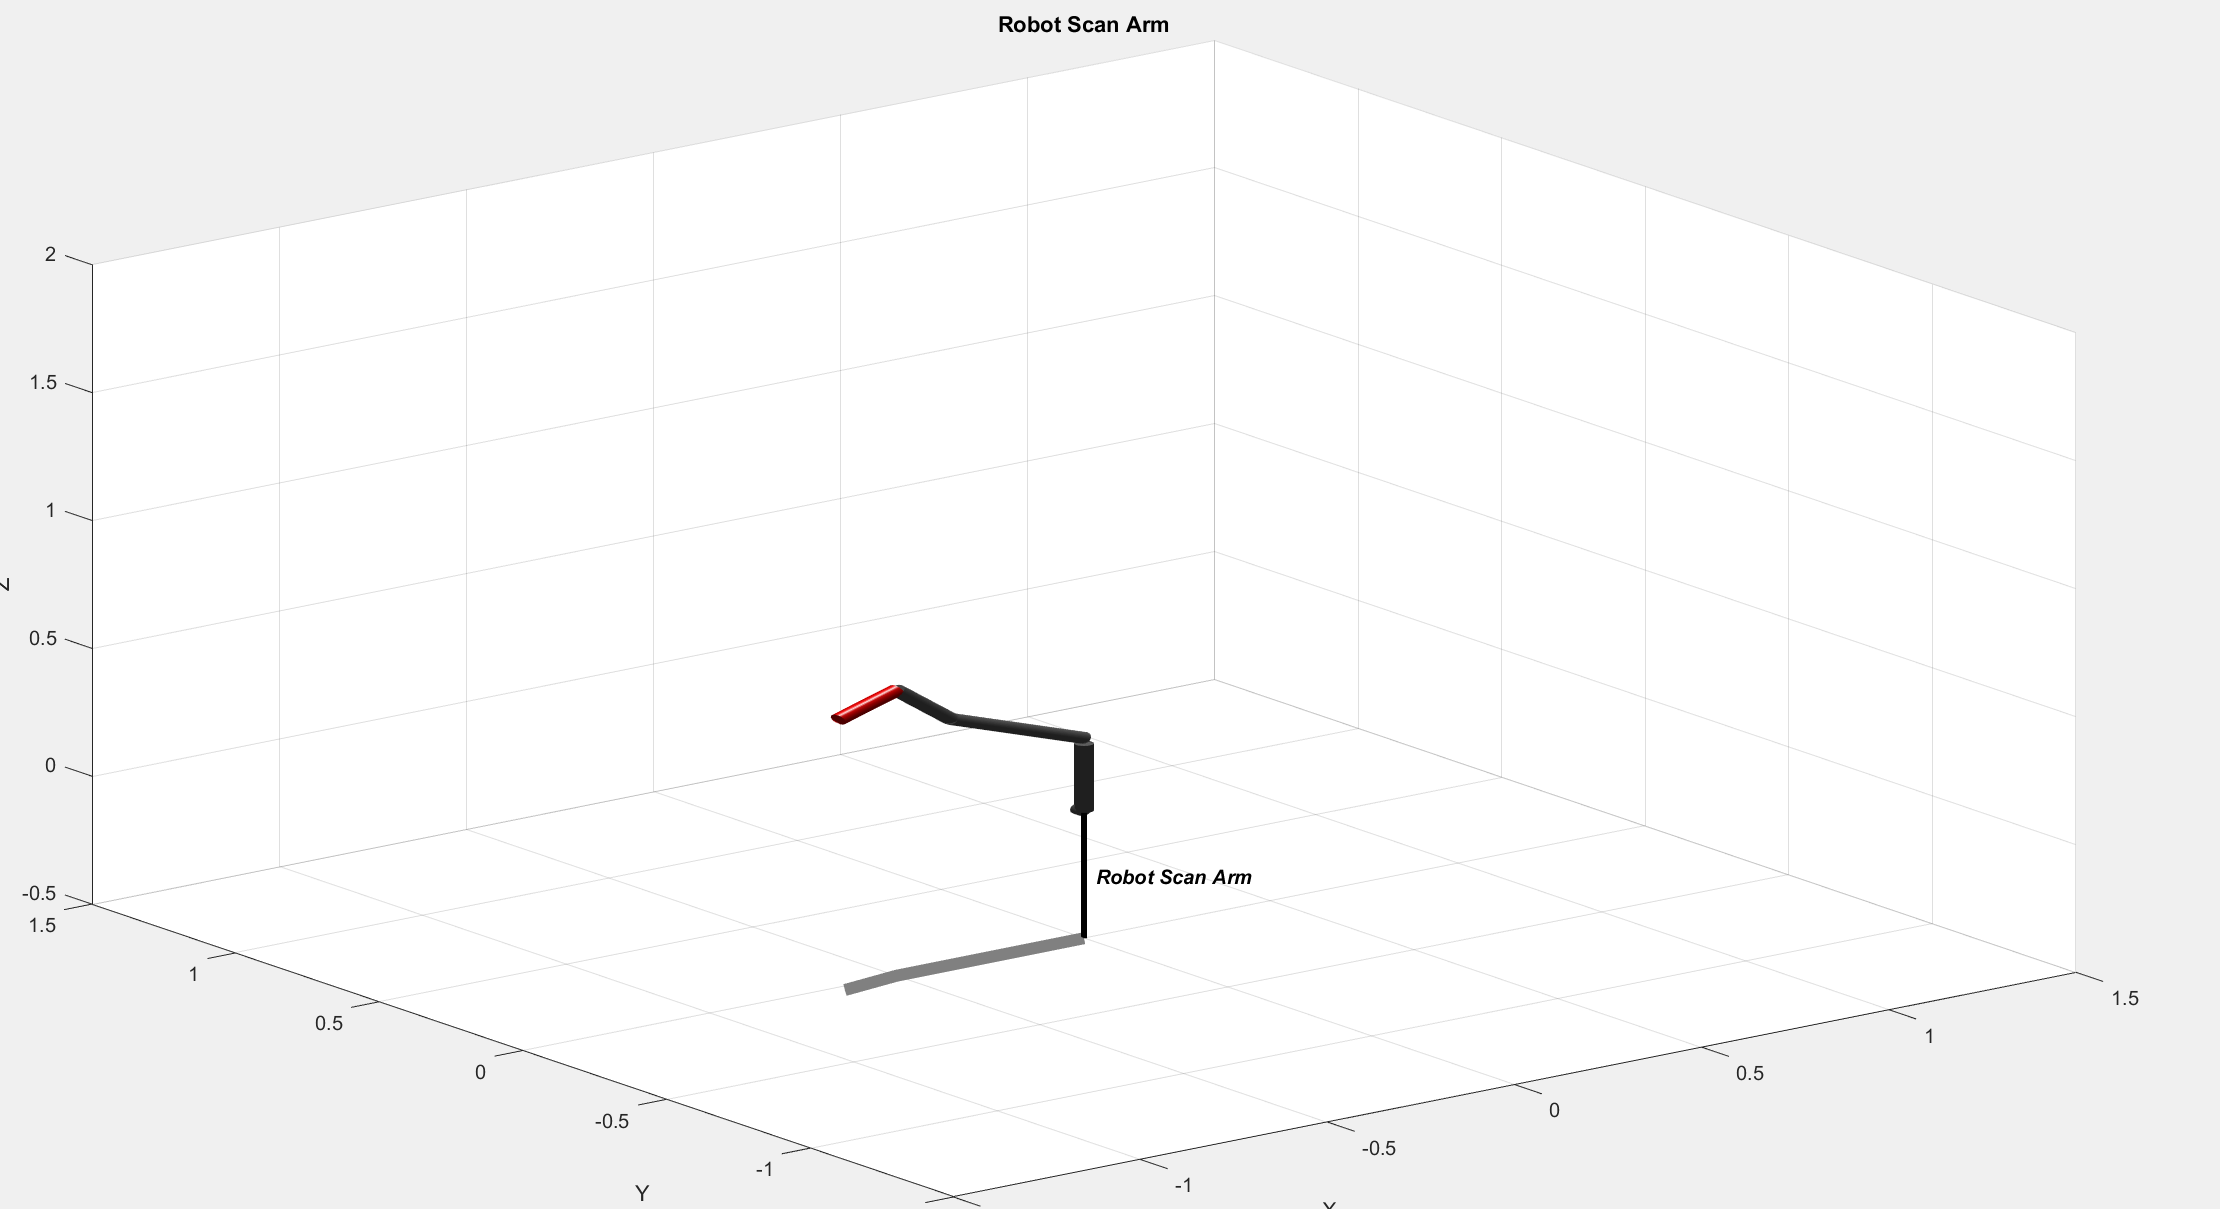






















































## Conveniencia frente a alternativas

Frente a la contratación de un metrólogo externo, esta solución reduce la dependencia de agenda y el coste recurrente, a la vez que internaliza el conocimiento y garantiza la reproducibilidad mediante scripts y simulación previa. 

Una CMM puente superaría la precisión, pero su coste, huella espacial y falta de portabilidad la vuelven desproporcionada para una célula didáctica o procesos ágiles. 

Los instrumentos manuales (calibres, plantillas) son económicos y veloces, aunque poco versátiles y sin capacidad para capturar geometría 3D completa. 

Un robot industrial estándar aporta potencia y automatización, pero exige integración de seguridad y suele ser excesivo en costo y espacio para inspección flexible. 

El 6R tipo ScanArm, en cambio, es portátil, versátil, orientable y totalmente guionable, además de alinearse con los criterios de la cátedra (DH, CD/CI, jacobiano, trayectorias y simulación). Si se desea avanzar a control cooperativo, la transición es natural sin modificar el modelo geométrico.

Resumiendo las caracteristicas de cada uno:

| Metrologo | CMM fija/Puente | Calibres/Plantillas | Robot Industrial | Faro Scan Arm |
|------------|-----------------|---------------------|------------------|----------------|
| Costo recurrente | Excelente precisión | Rápidos según quien los use | Potente | Portátil |
| Dependencia de disponibilidad | Mala portabilidad | Baratos | Requiere integración de seguridad | Versátil |
| Poca transferencia del Know How a la empresa | Sobredimensionamiento para la célula didáctica | Poco versátiles | Suele tener un alto costo en relación con la aplicación | Didáctico |
| Cero control sobre la reproducibilidad del pipeline y la simulación previa |  | Producción ágil | El plano de diseño es muy complejo | Se puede programar |

## Alcance verificable del proyecto

El trabajo demostrará, con base en el repositorio, la definición y justificación de la tabla DH; la cinemática directa validada en posturas de prueba; la cinemática inversa numérica para planificar poses objetivo; el jacobiano con análisis de manipulabilidad y singularidades aplicadas al escaneo; la planificación de trayectorias articulares y cartesianas con temporización LSPB y quintic; y simulaciones del espacio de trabajo, perfiles cinemáticos y animaciones. Se incorporan criterios de seguridad y límites de juntas en todos los casos.

## Nota sobre las demostraciones

Las validaciones se realizarán mediante trayectorias simples y reproducibles: movimientos punto a punto entre referencias, un arco manteniendo la normal del TCP y un raster lineal sobre un plano virtual. En modo pasivo, estas trayectorias sirven como guía para el operario; en modo cooperativo actuado, se ejecutan con cinemática inversa respetando los límites definidos.

# Información del Scan Arm

El Scan Arm considerado es un manipulador 6R concebido para **medición y escaneo** guiados por el usuario (modo pasivo) y, en nuestra variante académica, también para **planificación/ejecución asistida** (modo cooperativo). Su mérito no es mover cargas paletizadas ni soldar chasis; es **posicionar** con libertad la punta y **orientarla** con precisión sobre superficies, requiriendo un costo financiero y espacial menor al de una CMM.

## Concepto y principio de operación

El brazo trabaja como **AACMM** (*Articulated Arm Coordinate Measuring Machine* o *Máquina de Medición por Coordenadas de brazo articulado*): una cadena cinemática en serie con **encoders** y **motores** en cada junta. En modo pasivo, el operario desplaza el brazo y el sistema reconstruye la pose del TCP por **cinemática directa**, es decir con los motores apagados. Pero en nuestra aplicacion utilizamos el modo activo, en la que los motores estan encendidos.

Para el proyecto adoptamos **DH estándar** en **metros** y demostramos, además, cinemática inversa para planificar vías que el operario puede seguir o que un sistema actuado podría ejecutar.

## Arquitectura mecánica y GDL

Se modela una estructura 6 GDL: tres ejes “de brazo” para posicionamiento grueso y tres “de muñeca” para orientar la herramienta. Esta partición permite mantener la normal del sensor durante barridos, que es donde este tipo de brazo brilla. Un **7.º eje** es habitual cuando se agrega un **escáner láser** o se requieren orientaciones más ricas sin sacrificar ergonomía, pero el alcance del trabajo integrador queda cubierto con 6.

## Sensado, referencia y herramientas

Cada articulación reporta posición angular; el marco de referencia está en la base. El **TCP** puede ser un **palpador táctil** o el **soporte de una cabeza de escaneo**. La precisión práctica depende de tres patas: 

(i) **calibración geométrica** del modelo

(ii) **resolución/ruido** de encoders

(iii) **rigidez** del conjunto. 

Por eso los flujos serios incluyen **compensación de sonda** y pruebas periódicas tipo **esfera/artefacto** para verificar que la CD refleje la realidad. Esta calibración repetitiva es lo que permite asegurar la precisión y validez de las mediciones realizadas, para evitar corrimientos de los motores y articulaciones de sus posiciones esperadas.

## Definicion y tipos de articulaciones
| Juntura | Tipo | Movimiento | Eje | Notas |
|:--------------|:-------------|:--------------------------------|:-------------------|:-------------------------------------------------------------------|
| J1 (Base)     | Revolucion (R) | Yaw (rotación alrededor de z)   | z0 | Base: orientación de toda la cadena.|
| J2 (Hombro)   | Revolucion (R) | Pitch (rotación alrededor de y) | y1 | Primer eje de brazo para posicionamiento grueso.                   |
| J3 (Codo)     | Revolucion (R) | Yaw (rotación alrededor de z)   | z2 | Segundo eje de brazo; define alcance del TCP.                      |
| J4 (Muñeca 1) | Revolucion (R) | Yaw (rotación alrededor de z)   | z3 | Primer eje de muñeca para orientar herramienta.                    |
| J5 (Muñeca 2) | Revolucion (R) | Roll (rotación alrededor de x)  | x4 | Segundo eje de muñeca; controla inclinación del TCP.               |
| J6 (Muñeca 3) | Revolucion (R) | Yaw (rotación alrededor de z)   | z5 | Eje de orientación fina del efector.                     |

## Modelado geométrico (DH)

El brazo se parametriza con la tabla DH provista (convención estándar). El orden de ejes y los signos de $\alpha_i$ se fijan siguiendo la regla clásica: $z_i$ alineado al eje de la junta $(i)$, $x_i$ hacia el común perpendicular, y $\alpha_i$ como el giro de $x_i$ a $x_{i+1}$. Con esto se obtienen las matrices homogéneas $A_i$ y la pose ${}^{0}T_6$. La **CD** valida la geometría; la **CI** se usa para planear movimientos hacia poses objetivo sin caer en configuraciones mal condicionadas.

![alt text](Pictures/Robot_con_ejes.png)

![alt text](Pictures/Matriz_DH.png)

Comentario: Nuestro robot no tiene en realidad un muñeca esferica, pero para simplificacion y analisis se hizo la consideracion de que si la tiene, para salvar ciertos comflictos, como por ejemplo en el calculo de ccinemica inversa.


## Workspace, ergonomía y límites

El **espacio de trabajo** se estima barriendo $\mathbf{q}$ dentro de **límites articulares** realistas. En el informe se mostrará la **nube del TCP** y se señalarán zonas “incómodas” donde el **jacobiano** se degrada (codo estirado, ejes de muñeca alineados). A efectos de seguridad y sensatez, toda trayectoria reclama límites de posición, velocidad y aceleración.















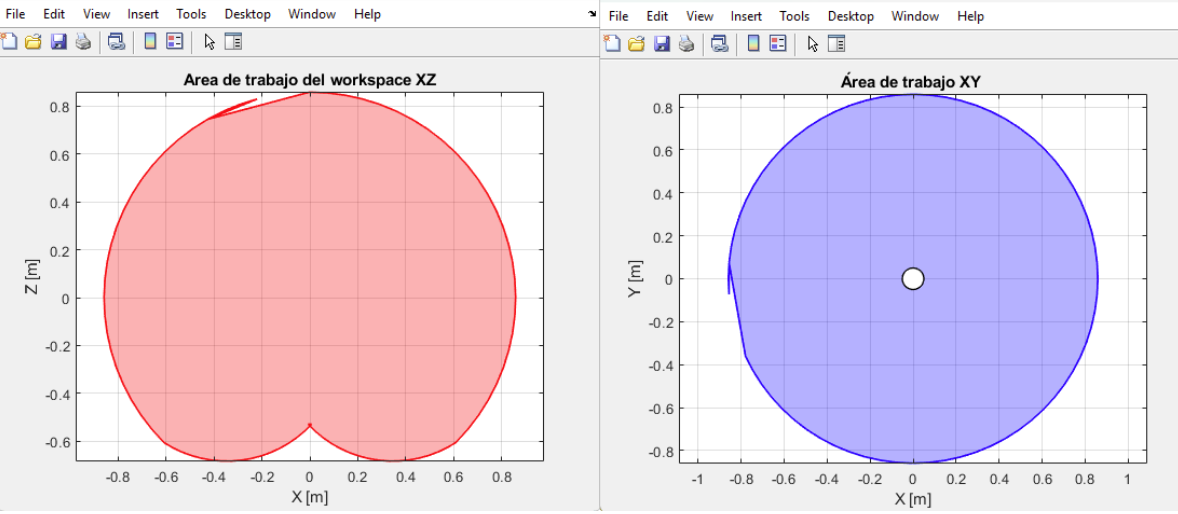













# Cinematica Directa

A partir de la parametrización obtenida mediante el método **Denavit–Hartenberg**, se desarrolló el cálculo de la **cinemática directa** para el robot **ScanArm 6R**, utilizando tanto formulaciones teóricas como herramientas computacionales.  
El objetivo fue determinar la posición y orientación del efector final respecto al sistema base a partir de las variables articulares del robot, representadas por el vector:

$$
\mathbf{q} = [q_1, q_2, q_3, q_4, q_5, q_6]
$$

Mediante el producto de las matrices homogéneas de transformación $( {}^{i-1}\!T_i )$, se obtiene la matriz total:

$$
{}^{0}\!T_{6} = {}^{0}\!T_{1} \cdot {}^{1}\!T_{2} \cdot {}^{2}\!T_{3} \cdot {}^{3}\!T_{4} \cdot {}^{4}\!T_{5} \cdot {}^{5}\!T_{6}
$$

Esta matriz describe completamente la **pose del gripper** respecto al sistema base, permitiendo conocer en todo momento la posición y orientación del efector dentro del entorno de trabajo. Para eso se usó la funcion fkine(q) del toolbox de Peter Corke, con eso y conla matriz DH podemos obtener $( {}^{0}\!T_6 )$

En nuestro caso, la cinemática directa se utilizó principalmente para determinar la posición inicial del gripper y su orientación en distintas configuraciones, lo que permitió validar que el modelo DH adoptado era coherente con la geometría real del brazo.  
A través de este análisis, fue posible ubicar con precisión el efector final en el espacio de trabajo y comprobar que el robot podía alcanzar los puntos requeridos sin violar los límites articulares ni las restricciones físicas del modelo.

Además, la cinemática directa nos permitió **determinar el espacio de trabajo efectivo** del ScanArm, ayudando a definir las zonas de alcance y los límites de movimiento de cada articulación.  
Este resultado fue esencial para el diseño del **layout de la celda**, ya que permitió posicionar el robot de forma que optimizara su rango operativo y evitara interferencias con otros elementos del entorno.

La cinematica directa ademas es fundamental para el funcionamiento del robot en modo cooperativo, ya que en este modo se miden las posiciones articulares y el punto de medicion es determinado por la cinematica directa.

Por último, la validación del modelo se realizó comparando los resultados teóricos obtenidos mediante el algoritmo DH con las posiciones estimadas en el modelo 3D del robot.  
Las diferencias observadas fueron mínimas, confirmando la correcta definición de los parámetros y el buen ajuste entre el modelo matemático y la estructura física.  
De esta forma, se garantizó que las trayectorias generadas posteriormente se desarrollaran dentro de los límites seguros del sistema y del espacio disponible en la celda de trabajo.

### Método de solución

1. **Tabla DH**  
   Se utiliza la tabla DH definida en el punto (i), con los parámetros $(a_i, \alpha_i, d_i, \theta_i)$.  
   Para las articulaciones revolutas, el parámetro variable es el ángulo $(\theta_i = q_i + \theta_{i0})$.

2. **Transformación elemental**  
   Cada matriz ($ {}^{i-1}\!T_i $) se construye según:

   $$
   {}^{i-1}\!T_i =
   \begin{bmatrix}
   \cos\theta_i & -\sin\theta_i\cos\alpha_i & \sin\theta_i\sin\alpha_i & a_i\cos\theta_i \\
   \sin\theta_i & \cos\theta_i\cos\alpha_i & -\cos\theta_i\sin\alpha_i & a_i\sin\theta_i \\
   0 & \sin\alpha_i & \cos\alpha_i & d_i \\
   0 & 0 & 0 & 1
   \end{bmatrix}
   $$

3. **Composición de transformaciones**  
   La matriz total $( {}^{0}\!T_{6} )$ se obtiene multiplicando secuencialmente las seis matrices elementales.

4. **Obtención de la pose**  
   - **Posición:** coordenadas del efector $(x, y, z)$ = última columna de $( {}^{0}\!T_{6} )$.  
   - **Orientación:** matriz de rotación $( R = {}^{0}\!R_{6} )$.

---


# Cinematica Inversa

Para el calculo de la cinematica inversa de nuestro robot utilizamos la funcion de cinematica inversa cin_inv_Faro que definimos el el trabajo practico nro 5B, que utiliza el calculo analitico para encontrar los q<sub>1</sub>, q<sub>2</sub>, q<sub>3</sub>, q<sub>4</sub>, q<sub>5</sub> y q<sub>6</sub> para llegar al punto inicial de la trayectoria y luego a los siguientes puntos de la misma.
Es importante destacar que pudimos realizar el desacople de la muñeca del resto del robot por el hecho de haber considerado que nuestro robot es del tipo muñeca esferica, sin esta simplificacion no podriamos haber utilizado este metodo. 
Llamaremos p al punto al que queremos llegar, p<sub>m</sub> al punto del sistema de la muñeca, en un principio referenciados al sistema S<sub>0</sub> (base de nuestro robot)

+  Para calcular **q<sub>1</sub>** : como solo rota el brazo entero, y sabemos que la muñeca se debe alinear con el punto p, entonces basta con calcular  q<sub>1</sub>=$\tan\left(\frac{p_{my}}{p_{mx}}\right)$ (2 soluciones)
+ Para calcular **q<sub>2</sub>** trasladamos el sistema a S<sub>1</sub> y referenciamos todo al mismo, entonces para cada q<sub>1</sub>, calculamos 2 q<sub>2</sub>(codo arriba y codo abajo):
![alt text](<Pictures/grafico Q2.png>)   
 de donde calculamos r, G y B y q2= B +- G
+ Para el calculo de q<sub>3</sub> volvemos a arefenrenciar todo al sistema S<sub>2</sub> y calculamos q<sub>3</sub> con las proyecciones de p<sub>m</sub>
+ Para el calculo de q<sub>4</sub> q<sub>5</sub> y q<sub>6</sub> se construye la matriz de transformacion directa T<sub>0</sub><sup>6</sup>  y obetenemos Obtener la transformada relativa muñeca T<sub>3</sub><suo>6</sup> necesaria para alcanzar T, como la muñeca solo nos aporta la orientacion, usamos solo la parte R de T<sub>3</sub><sup>6</sup>, y calculamos q<sub>4</sub> q<sub>5</sub> y q<sub>6</sub>.
  

Ademas, en el calculo de la cinemtica inversa, nuestro robot llega al punto indicado, pero el q<sub>2</sub> esta 2pi adelantado, esto es debido al calculo trigonometrico ya que las soluciones matematicas son infinitcas, por lo que tuvimos que restarle 2$\pi$, para asegurarnos de que los valores de q2 esten dentro de los limites articulares.

# Relacion de velocidades  (jacobiano)

# Planificacion y generacion de trayectoria

## Precisión y repetibilidad: qué afecta y cómo se cuida

Las fuentes de error típicas incluyen **offsets geométricos**, **backlash**, **compliance**, **deriva térmica** y el propio **ruido de medida**. En análisis, el **jacobiano** permite entender cómo pequeños errores articulares se amplifican en el TCP. En práctica, se atenúa con buena calibración, perfiles de movimiento suaves (LSPB/quintic) y evitando regiones cercanas a singularidades.

## Modos de uso en el proyecto

* **Pasivo (realista):** el operador sigue **trayectorias recomendadas** generadas por el planificador; el sistema registra poses vía CD.
* **Cooperativo actuado (académico):** el mismo modelo ejecuta **vías simples** con CI numérica y perfiles temporales que respetan límites.

# Sensores y actuadores

En un Scan Arm de grado metrológico el operario es el motor. La arquitectura base es pasiva: cada articulación incorpora sensado angular y el sistema reconstruye la pose por  cinemática directa . “Actuadores”, en este contexto, no significa servomotores que mueven el brazo, sino  mecanismos y ayudas activas que mejoran ergonomía, seguridad y calidad de dato. Para cumplir con la cátedra también contemplamos una variante cooperativa actuada en simulación, donde la CI cobra sentido operativo.

## Sensores

a) Posicionamiento (juntas). 
El corazón del brazo son los encoders. Dos familias cubren casi todo el mercado:

* Incrementales. Miden cambios relativos y requieren referenciación al iniciar. Son precisos y comunes, pero si se pierde energía o se sufre un golpe serio, se puede perder el cero y arruinar una medición hasta re-alinear.

* Absolutos. Reportan posición  sin homing ni calentamiento previo significativo y sobreviven cortes de energía sin perder la referencia. Suelen simplificar el flujo de trabajo y disminuir errores “humanos” de setup.

En ambos casos, la precisión efectiva depende de resolución, ruido, rigidez del tren mecánico y calibración geométrica.

b) Adquisición (efector). 
Hay dos modos típicos:

* Palpador táctil. Sencillo y robusto; ideal para validaciones puntuales y para chequear que el modelo CD se ubica donde debe.

* Escáner láser (LLP). Usa  triangulación líneal láser + cámara CMOS de alta velocidad. Entrega una nube de puntos a un gran ritmo de adquision de datos; en este caso la calidad real es el producto de “encoders buenos” + “óptica buena”. La longitud de onda “azul” suele rendir mejor en superficies oscuras o reflectivas; las cabezas modernas ajustan exposición/potencia en tiempo real para no depender de sprays. Para el TP alcanza con describir la física, el pipeline de registro y los límites: reflectividad, ángulo de incidencia, halo especular.

## “Actuadores” en brazos pasivos

Tres componentes mecanicos ayudan a mantener la precisión de los datos:

* Contrapeso interno. Mecanismo pasivo que neutraliza gravedad, reduce fatiga y evita que el brazo pierda rigidez si se suelta una articulación.

* Bloqueo/freno de junta. Sistema de sujeción para soltar las manos en una pose intermedia o parquear con seguridad.

* Retroalimentación al usuario. Indicadores hápticos o en muñeca que vibran/alertan ante eventos: fuera de rango, baja calidad de escaneo, confirmación de trigger. Reducen fallas en entornos ruidosos.

Nada de esto mueve el brazo de manera autónoma, pero disminuye el error humano y estabiliza mediciones largas.

## Variante cooperativa actuada (enfoque académico)

Para justificar cinemática inversa y planeamiento, se plantea una opción actuada en simulación:

* Motores backdrivable o con control de admitancia/impedancia para que el humano guíe y el robot asista, con perfiles LSPB/quintic y límites de junta.

* Sensado de par (o estimado) para contacto suave y virtual fixtures que “peguen” la punta a una superficie virtual durante el barrido.

* Seguridad: paradas controladas, zonas de exclusión y validación previa del Jacobiano para evitar regiones mal condicionadas.


## Selección concreta para el proyecto

* Juntas: se presenta el modelo con encoders absolutos como mejor práctica por robustez de flujo.

* Efector: se utiliza palpador como baseline de validación y se describe el caso LLP para el escenario de escaneo, con sus restricciones ópticas.

* Ergonomía: se asume contrapeso interno; si hay freno o feedback, se consignará como mejora opcional.

* Actuación (académico): ejecución en simulación de P2P, arco con normal controlada y raster cartesiano con CI numérica y perfiles de velocidad.


# Conclusión

# Conclusiones

El proyecto estableció una base cinemática sólida para un brazo tipo ScanArm de 6 GDL parametrizado con DH estándar (unidades en metros), alineada con los objetivos de la cátedra. Se modeló la cadena geométrica, se implementó la cinemática directa y se incorporó una solución numérica de cinemática inversa orientada a planificación, aun considerando que el uso industrial habitual de estos equipos es pasivo. Este enfoque dual permitió estudiar alcanzabilidad y orientar la herramienta con criterios reproducibles, sin depender de un hardware actuado real.

El análisis del jacobiano y de las singularidades brindó un mapa claro de zonas mal condicionadas, útil para definir restricciones de operación y para justificar decisiones de trayectoria. La planificación en espacio articular con perfiles LSPB y polinomios de quinto orden, junto con trayectorias cartesianas en SE(3), mostró transiciones suaves que respetan límites de posición, velocidad y aceleración, condición necesaria para preservar la calidad metrológica. Las demostraciones se realizaron deliberadamente con trayectorias simples (punto a punto, arco con normal controlada y raster sobre plano), suficientes para validar el modelo, ilustrar la relación con el jacobiano y documentar resultados de forma clara.

En cuanto a instrumentación, se describió el rol central de los encoders de junta y se caracterizaron dos modalidades de adquisición en el efector (palpador y escáner óptico), subrayando cómo la calidad de dato depende de la calibración geométrica, la rigidez del conjunto y los perfiles cinemáticos. Para el contexto académico, se presentó una variante cooperativa actuada a nivel de simulación que habilita la ejecución automática de vías mediante cinemática inversa, sin alterar el modelo geométrico de base ni la trazabilidad del análisis.

El trabajo es reproducible: se integró en scripts de MATLAB que generan las figuras de workspace, los perfiles cinemáticos y las animaciones empleadas en el informe. Esto facilita repetir experimentos, ajustar límites articulares y explorar nuevas trayectorias de forma controlada.

Como limitaciones, no se realizó calibración geométrica con artefactos físicos ni validación de incertidumbre de medida en banco real, y no se integró control a nivel de par ni sensado de fuerza para contacto. Quedan abiertas líneas de trabajo que agregan valor directo: calibración y compensación geométrica, incorporación de un modelo simple de error para estimar incertidumbre en el TCP, extensión a 7 GDL para mejorar la orientabilidad en escaneo, y validación experimental de perfiles temporales frente a restricciones de sensor (frecuencia de muestreo, reflectividad y ángulo de incidencia). Estas extensiones no modifican los resultados centrales del informe: el modelo cinemático es consistente, las trayectorias cumplen criterios de suavidad y límites, y el marco propuesto es adecuado para inspección y escaneo en una célula didáctica o de baja complejidad.


# Referencias

[1] FARO Technologies, “Quantum X FaroArm® Series | Brochure,” Oct. 2024. [Online]. Available: https://…/Brochure_Quantum-X_3DM_ENG_Web.pdf. Accessed: Nov. 2, 2025. ([letoltes.sidex.hu][1])

[2] FARO Technologies, “Quantum X FaroArm® Series (product page),” 2025. [Online]. Available: [https://www.faro.com/en/Products/Hardware/Quantum-FaroArms](https://www.faro.com/en/Products/Hardware/Quantum-FaroArms). Accessed: Nov. 2, 2025. ([FARO.com][2])

[3] Hexagon Manufacturing Intelligence, “The Absolute Arm (A4 brochure),” 2025. [Online]. Available: https://…/Hexagon-MI-Arm-Absolute-Arm-Brochure-A4-en.pdf. Accessed: Nov. 2, 2025. ([shop.hexagonmi.com][3])

[4] Hexagon Manufacturing Intelligence, “Absolute Arm systems and accessories (catalog),” 2023. [Online]. Available: [https://hexagon.com/…/hexagon_mi_arm_absolute_arm_catalog_23_210x210_en.pdf](https://hexagon.com/…/hexagon_mi_arm_absolute_arm_catalog_23_210x210_en.pdf). Accessed: Nov. 2, 2025. ([hexagon.com][4])

[5] Nikon Metrology, “MCAx S portable CMM arm with ModelMaker H120 (datasheet),” 2021. [Online]. Available: [https://industry.nikon.com/…/mcaxs-modelmaker-h120-en.pdf](https://industry.nikon.com/…/mcaxs-modelmaker-h120-en.pdf). Accessed: Nov. 2, 2025. ([Nikon Industrial Metrology - MASTER][5])

[6] Kreon, “ACE measuring arm & Skyline scanners (brochure),” 2021. [Online]. Available: [https://www.crossco.com/…/Kreon-Ace-Brochure.pdf](https://www.crossco.com/…/Kreon-Ace-Brochure.pdf). Accessed: Nov. 2, 2025. ([CrossCo][6])

[7] Kreon, “Measuring arm – Ace (product page),” 2025. [Online]. Available: [https://www.kreon3d.com/products/ace-measuring-arm](https://www.kreon3d.com/products/ace-measuring-arm). Accessed: Nov. 2, 2025. ([kreon3d.com][7])

[8] Creaform, “HandyPROBE technical specifications,” 2025. [Online]. Available: [https://www.creaform3d.com/en/products/coordinate-measuring-machines-handyprobe/technical-specifications](https://www.creaform3d.com/en/products/coordinate-measuring-machines-handyprobe/technical-specifications). Accessed: Nov. 2, 2025. ([creaform3d.com][8])

[9] Creaform, “Coordinate measuring machines – HandyPROBE (product page),” 2025. [Online]. Available: [https://www.creaform3d.com/en/products/coordinate-measuring-machines-handyprobe](https://www.creaform3d.com/en/products/coordinate-measuring-machines-handyprobe). Accessed: Nov. 2, 2025. ([creaform3d.com][9])

[10] ISO, *ISO 10360-12:2016 — Geometrical product specifications (GPS) — Acceptance and reverification tests for coordinate measuring machines (CMM) — Part 12: Articulated arm CMM*. Geneva, Switzerland: International Organization for Standardization, 2016. [Online]. Available: https://…/ISO-10360-12-2016.pdf. Accessed: Nov. 2, 2025. ([Iteh][10])

[11] ISO, *ISO 10360-8:2013 — Geometrical product specifications (GPS) — Acceptance and reverification tests for coordinate measuring machines (CMM) — Part 8: CMMs with optical distance sensors*. Geneva, Switzerland: International Organization for Standardization, 2013. [Online]. Available: [https://www.iso.org/standard/54522.html](https://www.iso.org/standard/54522.html). Accessed: Nov. 2, 2025. ([iso.org][11])

[12] Kreon, “ISO 10360-12 standard for measuring arms (explainer article),” 2023. [Online]. Available: [https://www.kreon3d.com/article/iso-10360-12-standard-for-measuring-arms](https://www.kreon3d.com/article/iso-10360-12-standard-for-measuring-arms). Accessed: Nov. 2, 2025. ([kreon3d.com][12])

[13] P. Corke, *Robotics, Vision & Control: Fundamental Algorithms in MATLAB*, 2nd ed. Cham, Switzerland: Springer, 2017. [Online]. Available: [https://petercorke.com/books/robotics-vision-control-all-versions/](https://petercorke.com/books/robotics-vision-control-all-versions/). Accessed: Nov. 2, 2025. ([Peter Corke][13])

[14] P. Corke, “Robotics Toolbox for MATLAB (official site),” 2025. [Online]. Available: [https://petercorke.com/toolboxes/robotics-toolbox/](https://petercorke.com/toolboxes/robotics-toolbox/). Accessed: Nov. 2, 2025. ([Peter Corke][14])

[15] P. Corke, “Robotics Toolbox for MATLAB (GitHub repository),” 2025. [Online]. Available: [https://github.com/petercorke/robotics-toolbox-matlab](https://github.com/petercorke/robotics-toolbox-matlab). Accessed: Nov. 2, 2025. ([GitHub][15])

[16] J. Haviland and P. Corke, “A Systematic Approach to Computing the Manipulator Jacobian and Hessian using the Elementary Transform Sequence,” *arXiv:2010.08696*, 2020. [Online]. Available: [https://arxiv.org/abs/2010.08696](https://arxiv.org/abs/2010.08696). Accessed: Nov. 2, 2025. ([arXiv][16])

[17] J. Haviland and P. Corke, “Manipulator Differential Kinematics: Part 1: Kinematics, Velocity, and Applications,” *arXiv:2207.01796*, 2022. [Online]. Available: [https://arxiv.org/abs/2207.01796](https://arxiv.org/abs/2207.01796). Accessed: Nov. 2, 2025. ([arXiv][17])

[18] FARO Technologies, “Quantum X FaroArm® Series | Brochure (web page),” 2025. [Online]. Available: [https://www.faro.com/en/Resource-Library/Brochure/Quantum-FaroArm](https://www.faro.com/en/Resource-Library/Brochure/Quantum-FaroArm). Accessed: Nov. 2, 2025. ([FARO.com][18])



[1]: https://letoltes.sidex.hu/metrologia/faro-quantum-x-brochure-eng.pdf?utm_source=chatgpt.com "Quantum X - FaroArm® Series"
[2]: https://www.faro.com/en/Products/Hardware/Quantum-FaroArms?utm_source=chatgpt.com "Quantum X FaroArm® Series"
[3]: https://shop.hexagonmi.com/medias/Hexagon-MI-Arm-Absolute-Arm-Brochure-A4-en.pdf?context=bWFzdGVyfHJvb3R8NTczMDAzN3xhcHBsaWNhdGlvbi9wZGZ8YURVekwyaGtOUzg1TkRjeE1ERTFOVGd6TnpjMEwwaGxlR0ZuYjI1ZlRVbGZRWEp0WDBGaWMyOXNkWFJsSUVGeWJWOUNjbTlqYUhWeVpWOUJORjlsYmk1d1pHWXw3ZDA0NjhlN2I3ZDRlOGJkY2M1MjFmMDA5OGE0ZGRhZjUwNWQwNDkxMGMxNDljYjBiNmQzZWM5YjFiNjc2YTNk&utm_source=chatgpt.com "The Absolute Arm - Shop Hexagon"
[4]: https://hexagon.com/-/media/project/one-web/master-site/mi/pdf/hexagon_mi_arm_absolute_arm_catalog_23_210x210_en.pdf?utm_source=chatgpt.com "Absolute Arm systems and accessories"
[5]: https://industry.nikon.com/en-gb//wp-content/uploads/sites/6/2021/12/mcaxs-modelmaker-h120-en.pdf?utm_source=chatgpt.com "HANDHELD SCANNING"
[6]: https://www.crossco.com/wp-content/uploads/2022/01/Kreon-Ace-Brochure.pdf?utm_source=chatgpt.com "ACE measuring arm and Skyline scanners: - EYES - WIDE"
[7]: https://www.kreon3d.com/products/ace-measuring-arm?utm_source=chatgpt.com "Measuring arm - Ace - Inspect all industrial parts easily"
[8]: https://www.creaform3d.com/en/products/coordinate-measuring-machines-handyprobe/technical-specifications?utm_source=chatgpt.com "HandyPROBE Technical specifications"
[9]: https://www.creaform3d.com/en/products/coordinate-measuring-machines-handyprobe?utm_source=chatgpt.com "Coordinate measuring machines HandyProbe"
[10]: https://cdn.standards.iteh.ai/samples/63931/297d09a9fdad438490ce6f1d6fcb0db5/ISO-10360-12-2016.pdf?utm_source=chatgpt.com "INTERNATIONAL STANDARD ISO 10360-12"
[11]: https://www.iso.org/standard/54522.html?utm_source=chatgpt.com "ISO 10360-8:2013 - Geometrical product specifications ..."
[12]: https://www.kreon3d.com/article/iso-10360-12-standard-for-measuring-arms?utm_source=chatgpt.com "ISO 10360-12 standard for measuring arms - Kreon's 3D"
[13]: https://petercorke.com/books/robotics-vision-control-all-versions/?utm_source=chatgpt.com "Robotics, Vision & Control (all versions)"
[14]: https://petercorke.com/toolboxes/robotics-toolbox/?utm_source=chatgpt.com "Robotics Toolbox"
[15]: https://github.com/petercorke/robotics-toolbox-matlab?utm_source=chatgpt.com "petercorke/robotics-toolbox-matlab"
[16]: https://arxiv.org/abs/2010.08696?utm_source=chatgpt.com "A Systematic Approach to Computing the Manipulator Jacobian and Hessian using the Elementary Transform Sequence"
[17]: https://arxiv.org/abs/2207.01796?utm_source=chatgpt.com "Manipulator Differential Kinematics: Part 1: Kinematics, Velocity, and Applications"
[18]: https://www.faro.com/en/Resource-Library/Brochure/Quantum-FaroArm?utm_source=chatgpt.com "Quantum X FaroArm® Series​ | Brochure"


# Anexos